In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#importing the urnings algortihm
import main_urnings as mu

In [2]:
#np.random.seed(12312312)
#game settings
n_player = 5000
n_items = 1000
starting_score = 5
player_urn_sizes = 10
item_urn_sizes = 100
n_sim = 100

#true scores for players and items
item_true_values = np.random.uniform(0.1, 0.9, n_items)

#creating players and items
players = []
for i in range(n_player):
    player = mu.Player(user_id = "Student", score = starting_score, urn_size = player_urn_sizes, true_value = 0.5, so_score=10)
    players.append(player)

items = []
for i in range(n_items):
    iname = "item" + str(i)

    item = mu.Player(user_id = iname, score = np.round(item_true_values[i], 1) * item_urn_sizes, urn_size = item_urn_sizes, true_value = item_true_values[i])
    items.append(item)


adaptive_rule = mu.Game_Type(adaptivity="n_adaptive", alg_type="Urnings2")
adaptive_sim = mu.Urnings(players = players, items = items, game_type=adaptive_rule)

In [3]:
adaptive_sim.play(n_games=n_sim, test = True)

In [4]:
urnings_matrix = np.zeros((n_player, n_sim + 1))
for pl in range(n_player):
    row = players[pl].container
    urnings_matrix[pl,:] = row


print(urnings_matrix / player_urn_sizes)

np.savetxt("urnings_matrix_5_10_nochange.csv", urnings_matrix, delimiter=",")

[[0.5 0.5 0.5 ... 0.2 0.2 0.3]
 [0.5 0.4 0.4 ... 0.2 0.2 0.2]
 [0.5 0.5 0.5 ... 0.3 0.4 0.4]
 ...
 [0.5 0.6 0.6 ... 0.3 0.2 0.2]
 [0.5 0.5 0.4 ... 0.7 0.7 0.7]
 [0.5 0.5 0.5 ... 0.6 0.6 0.6]]


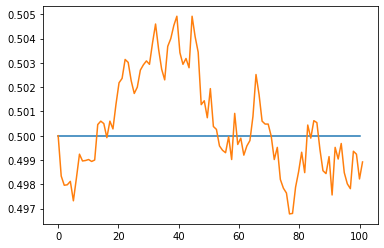

In [5]:
col_means = np.mean(urnings_matrix, axis = 0) / player_urn_sizes
col_var = np.std(urnings_matrix, axis = 0) / np.sqrt(n_player)

col_lower = np.zeros(len(col_means))
col_upper = np.zeros(len(col_means))
for i in range(len(col_means)):
    confint = np.percentile(urnings_matrix[:,i] / player_urn_sizes, [5, 95])
    col_lower[i] = confint[0]
    col_upper[i] = confint[1]


x = np.linspace(0, 101, 101)

plt.plot(np.repeat(0.5, len(col_means)))
plt.plot(x,col_means)
#plt.fill_between(x, col_upper, col_lower)


In [16]:
#np.random.seed(12312312)
#game settings
n_player = 5000
n_items = 1000
starting_score = 5
player_urn_sizes = 10
item_urn_sizes = 100
n_sim = 100

#true scores for players and items
item_true_values = np.random.uniform(0.1, 0.9, n_items)

#creating players and items
players = []
for i in range(n_player):
    player = mu.Player(user_id = "Student", score = starting_score, urn_size = player_urn_sizes, true_value = 0.5, so_score=10)
    players.append(player)

items = []
for i in range(n_items):
    iname = "item" + str(i)
    item_starting_score = np.random.binomial(item_urn_sizes, item_true_values[i])
    item = mu.Player(user_id = iname, score = item_starting_score, urn_size = item_urn_sizes, true_value = item_true_values[i])
    items.append(item)


adaptive_rule = mu.Game_Type(adaptivity="adaptive", alg_type="Urnings2")
adaptive_sim = mu.Urnings(players = players, items = items, game_type=adaptive_rule)

In [17]:
growth = np.zeros(n_sim)
for i in range(n_sim):
    adaptive_sim.play(n_games=1, test = True)
    growth[i] = players[0].true_value
    for pl in players:
        pl.true_value += 0.0001
        

In [8]:
urnings_matrix = np.zeros((n_player, n_sim + 1))
for pl in range(n_player):
    row = players[pl].container
    urnings_matrix[pl,:] = row


print(urnings_matrix / player_urn_sizes)

np.savetxt("urnings_matrix_5_10_change.csv", urnings_matrix, delimiter=",")

[[0.5 0.5 0.6 ... 0.4 0.5 0.4]
 [0.5 0.5 0.5 ... 0.4 0.5 0.6]
 [0.5 0.5 0.5 ... 0.5 0.6 0.7]
 ...
 [0.5 0.5 0.5 ... 0.7 0.8 0.8]
 [0.5 0.4 0.4 ... 0.5 0.5 0.4]
 [0.5 0.5 0.5 ... 0.4 0.5 0.4]]


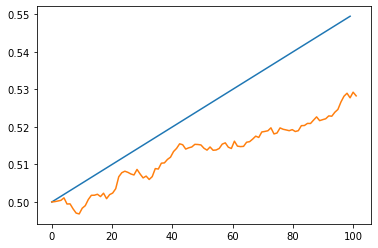

In [9]:
col_means = np.mean(urnings_matrix, axis = 0) / player_urn_sizes
col_var = np.std(urnings_matrix, axis = 0) / np.sqrt(n_player)

col_lower = np.zeros(len(col_means))
col_upper = np.zeros(len(col_means))
for i in range(len(col_means)):
    confint = np.percentile(urnings_matrix[:,i] / player_urn_sizes, [10, 90])
    col_lower[i] = confint[0]
    col_upper[i] = confint[1]


x = np.linspace(0, 101, 101)

plt.plot(growth)
plt.plot(x,col_means)
#plt.fill_between(x, col_upper, col_lower)

In [172]:
#np.random.seed(12312312)
#game settings
n_player = 100
n_items = 100000
starting_score = 6
player_urn_sizes = 12
item_urn_sizes = 100000
n_sim = 100

#true scores for players and items
item_true_values = np.random.uniform(0.1, 0.9, n_items)

#creating players and items
players = []
for i in range(n_player):
    player = mu.Player(user_id = "Student", score = starting_score, urn_size = player_urn_sizes, true_value = 0.5, so_score=10)
    players.append(player)

items = []
for i in range(n_items):
    iname = "item" + str(i)

    item = mu.Player(user_id = iname, score = np.round(item_true_values[i], 1) * item_urn_sizes, urn_size = item_urn_sizes, true_value = item_true_values[i])
    items.append(item)


adaptive_rule = mu.Game_Type(adaptivity="n_adaptive", alg_type="Urnings1")
adaptive_sim = mu.Urnings(players = players, items = items, game_type=adaptive_rule)

growth = np.zeros(n_sim)
for i in range(n_sim):
    adaptive_sim.play(n_games=1, test = True)
    growth[i] = players[0].true_value

    if i % 40 == 0:
        for pl in players:
            pl.true_value += 0.025
        

[[0.5        0.5        0.5        ... 0.66666667 0.66666667 0.66666667]
 [0.5        0.5        0.5        ... 0.5        0.5        0.5       ]
 [0.5        0.58333333 0.5        ... 0.41666667 0.41666667 0.41666667]
 ...
 [0.5        0.5        0.5        ... 0.75       0.75       0.75      ]
 [0.5        0.5        0.41666667 ... 0.5        0.58333333 0.66666667]
 [0.5        0.5        0.5        ... 0.16666667 0.25       0.25      ]]


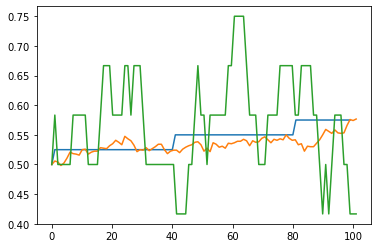

In [177]:
urnings_matrix = np.zeros((n_player, n_sim + 1))
for pl in range(n_player):
    row = players[pl].container
    urnings_matrix[pl,:] = row


print(urnings_matrix / player_urn_sizes)

np.savetxt("urnings_matrix_5_10_dischange.csv", urnings_matrix, delimiter=",")

col_means = np.mean(urnings_matrix, axis = 0) / player_urn_sizes
col_var = np.std(urnings_matrix, axis = 0) / np.sqrt(n_player)

col_lower = np.zeros(len(col_means))
col_upper = np.zeros(len(col_means))
for i in range(len(col_means)):
    confint = np.percentile(urnings_matrix[:,i] / player_urn_sizes, [10, 90])
    col_lower[i] = confint[0]
    col_upper[i] = confint[1]


x = np.linspace(0, 101, 101)

plt.plot(growth)
plt.plot(x,col_means)
plt.plot(x, urnings_matrix[2,:] / player_urn_sizes)
#plt.fill_between(x, col_upper, col_lower)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#importing the urnings algortihm
import main_urnings as mu

#parameters
player_urn_sizes = [6, 10, 14, 18, 50]
change = [0.0001, 0.0005, 0.001, 0.002]

#fixed parameters
n_player = 10
n_items = 1000
item_urn_sizes = 100
n_sim = 10
true_value = 0.5

#container for the results
urnings_array = np.zeros((n_player, n_sim + 1, len(change) * len(player_urn_sizes)))

counter = 0